In [1]:
# Add anna to the path
import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

DATA_DIR = "../../../data"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import anna.dataset.reuters21578.parser as data
import anna.model as model

%matplotlib inline

In [3]:
# Load data
train_docs, test_docs, unused_docs = data.fetch_and_parse(DATA_DIR)

In [4]:
# Preprocess labels
labels = []
for d in train_docs + test_docs:
    for l in d.labels:
        if l not in labels:
            labels.append(l)

In [5]:
# Create MLP classifier
model = model.DecRNN(DATA_DIR, labels)

Building model
Compiling model


In [6]:
# Train
history = model.train(train_docs, test_docs)

Train on 6993 samples, validate on 777 samples
Epoch 1/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 1.1164
val - acc: 0.4440, hamming: 0.9846, ebf1: 0.4519, mif1: 0.3980, maf1: 0.2900

test - acc: 0.5826, hamming: 0.9886, ebf1: 0.5986, mif1: 0.5420, maf1: 0.0302
6993/6993 [==============================]6993/6993 [==============================] - 10s 1ms/step - loss: 1.1109 - val_loss: 0.3245

Epoch 2/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.2788
val - acc: 0.4646, hamming: 0.9859, ebf1: 0.4892, mif1: 0.4434, maf1: 0.3226

test - acc: 0.5985, hamming: 0.9893, ebf1: 0.6205, mif1: 0.5690, maf1: 0.0345
6993/6993 [==============================]6993/6993 [==============================] - 9s 1ms/step - loss: 0.2784 - val_loss: 0.2649

Epoch 3/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.1881
val - acc


Epoch 21/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.0917
val - acc: 0.6795, hamming: 0.9929, ebf1: 0.7716, mif1: 0.7357, maf1: 0.5271

test - acc: 0.7413, hamming: 0.9940, ebf1: 0.8097, mif1: 0.7681, maf1: 0.2701
6993/6993 [==============================]6993/6993 [==============================] - 9s 1ms/step - loss: 0.0915 - val_loss: 0.2040

Epoch 22/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.0411
val - acc: 0.6782, hamming: 0.9930, ebf1: 0.7805, mif1: 0.7434, maf1: 0.5110

test - acc: 0.7459, hamming: 0.9940, ebf1: 0.8148, mif1: 0.7705, maf1: 0.2679
6993/6993 [==============================]6993/6993 [==============================] - 9s 1ms/step - loss: 0.0415 - val_loss: 0.1987

Epoch 23/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.0335
val - acc: 0.7040, hamming: 0.9934, ebf1: 0.7893, mif


Epoch 41/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.0220
val - acc: 0.6976, hamming: 0.9932, ebf1: 0.7789, mif1: 0.7481, maf1: 0.5464

test - acc: 0.7370, hamming: 0.9940, ebf1: 0.8048, mif1: 0.7664, maf1: 0.3278
6993/6993 [==============================]6993/6993 [==============================] - 9s 1ms/step - loss: 0.0219 - val_loss: 0.2404

Epoch 42/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.0177
val - acc: 0.7117, hamming: 0.9938, ebf1: 0.8055, mif1: 0.7701, maf1: 0.5569

test - acc: 0.7406, hamming: 0.9942, ebf1: 0.8158, mif1: 0.7767, maf1: 0.3246
6993/6993 [==============================]6993/6993 [==============================] - 9s 1ms/step - loss: 0.0176 - val_loss: 0.2181

Epoch 43/50
6944/6993 [============================>.]6944/6993 [============================>.] - ETA: 0s - loss: 0.0163
val - acc: 0.7220, hamming: 0.9937, ebf1: 0.8053, mif

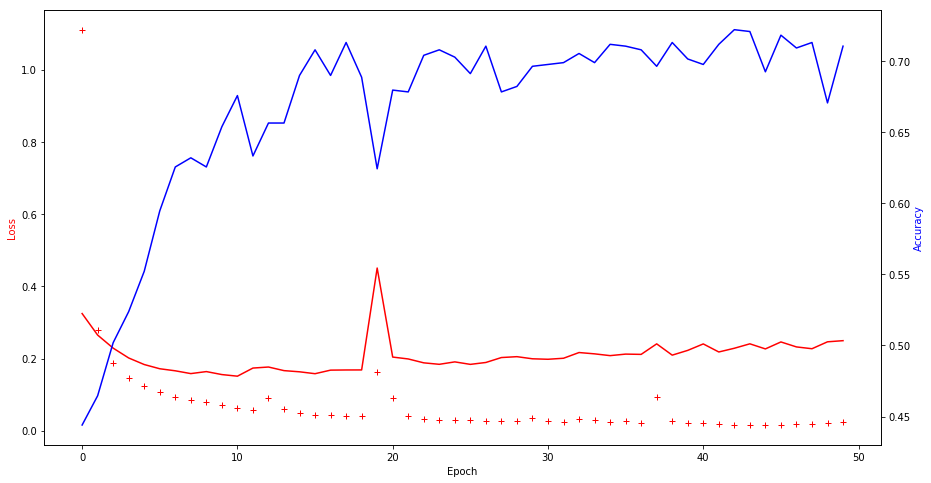

In [7]:
pre, ax = plt.subplots(figsize=[15, 8])

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss", color="r")
ax.plot(range(50), history.history["val_loss"], "r-")
ax.plot(range(50), history.history["loss"], "r+")

ax2 = ax.twinx()
ax2.set_ylabel("Accuracy", color="b")
ax2.plot(range(50), history.history["val_acc"], "b-")